<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Aprendizaje No supervizado: Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.

> `Etiquetas` para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Casos de Uso de K-Means

Algunos casos de uso son:

> **Segmentación por Comportamiento:** relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.

> **Categorización de Inventario:** agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples=1500, random_state=5)


In [3]:
X

array([[-4.4207936 ,  7.90908652],
       [-5.6742539 ,  8.24798888],
       [ 0.15096735,  3.72731887],
       ...,
       [-6.15312156,  7.33253057],
       [-6.20649316,  7.96321396],
       [ 0.8546093 ,  1.95771111]])

In [4]:
Y

array([0, 1, 2, ..., 0, 0, 2])

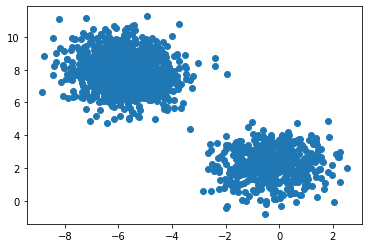

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [15]:
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters=2, random_state=5, init='random')
model = model.fit(X)
grupos = model.predict(X)
centroides = model.cluster_centers_

In [16]:
grupos

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [17]:
centroides

array([[-5.71812465,  7.91713291],
       [-0.28311991,  2.21942335]])

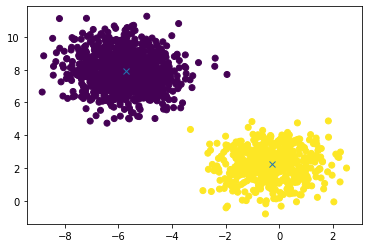

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=grupos)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()

In [19]:
model.inertia_

3233.411036000548

Text(0, 0.5, 'Inercia')

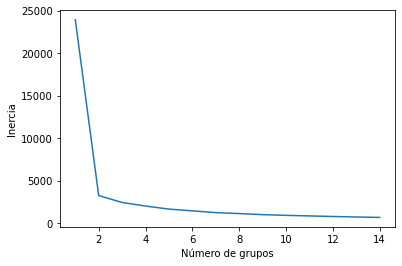

In [20]:
#%% Criterio de selección del codo
ngroup=15
inercias = np.zeros(ngroup)

for k in np.arange(1,ngroup):
    model = KMeans(n_clusters=k, random_state=5, init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_


plt.figure(figsize=(6,4))
plt.plot(np.arange(1,ngroup), inercias[1:])
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')


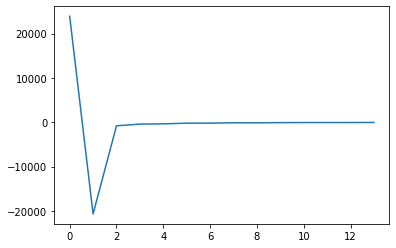

In [21]:
# Criterio del Gradiente
plt.plot(np.diff(inercias))


In [25]:
def criterio_codo_kmeans(ngroup, data):
    '''
    Esta función es para el análisis del criterio del codo para KMeans
    input:
    outpput:
    '''
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters=k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_

    
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), inercias[1:])
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia')

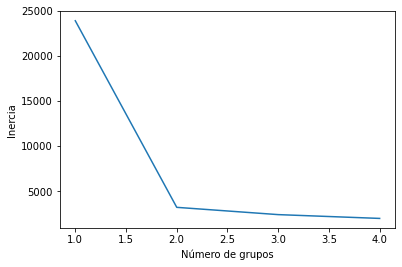

In [29]:
criterio_codo_kmeans(5,X)

In [26]:
help(criterio_codo_kmeans)

Help on function criterio_codo_kmeans in module __main__:

criterio_codo_kmeans(ngroup, data)
    Esta función es para el análisis del criterio del codo para KMeans
    input:
    outpput:



In [27]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [32]:
def criterio_gradiente_kmeans(ngroup, data):
    '''
    Esta función es para el análisis del criterio del gradiente para KMeans
    input:
    outpput:
    '''
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters=k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_

    # Calcular la derivada de las inercias
    gradiente = np.diff(inercias)
    
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), gradiente) #Plot de los grupos vs derivada de las inercias
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia')

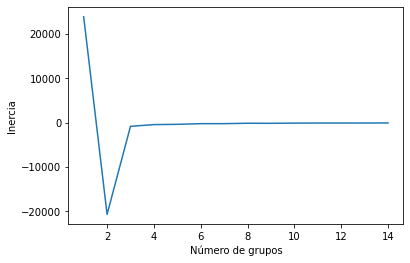

In [33]:
criterio_gradiente_kmeans(15,X)

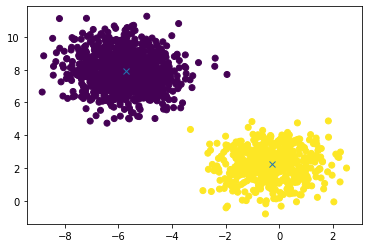

In [35]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos
#%% Aplicar el algoritmo Kmeans
model_op = KMeans(n_clusters=2, random_state=5, init='random')
model_op = model_op.fit(X)
grupos = model_op.predict(X)
centroides = model_op.cluster_centers_

plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=grupos)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()

## Ejemplo 2

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pandas as pd

In [39]:
#%% Leer los datos
data = pd.read_csv('Data/creditcard_sample.csv')
#%% drop de columnas time y class
data = data.drop(['Time','Class','Unnamed: 0'], axis=1)
#%% Estandarizar los datos


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142403 entries, 0 to 142402
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  142403 non-null  int64  
 1   Time        142403 non-null  float64
 2   V1          142403 non-null  float64
 3   V2          142403 non-null  float64
 4   V3          142403 non-null  float64
 5   V4          142403 non-null  float64
 6   V5          142403 non-null  float64
 7   V6          142403 non-null  float64
 8   V7          142403 non-null  float64
 9   V8          142403 non-null  float64
 10  V9          142403 non-null  float64
 11  V10         142403 non-null  float64
 12  V11         142403 non-null  float64
 13  V12         142403 non-null  float64
 14  V13         142403 non-null  float64
 15  V14         142403 non-null  float64
 16  V15         142403 non-null  float64
 17  V16         142403 non-null  float64
 18  V17         142403 non-null  float64
 19  V1

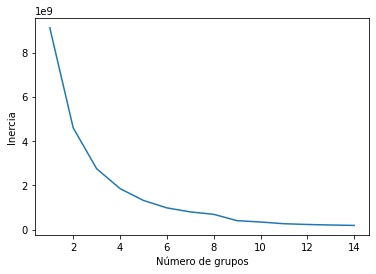

In [40]:
#%% Aplicar el algoritmo de clustering
# Aplicar el criterio de selección del codo
criterio_codo_kmeans(15,data)

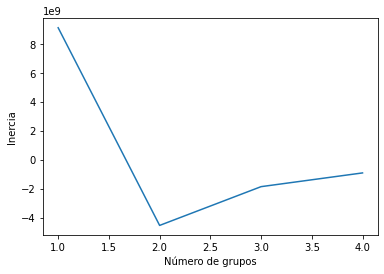

In [41]:
criterio_gradiente_kmeans(5,data)

In [42]:
model_opt = KMeans(n_clusters=2,random_state=5, init='random')
model_opt = model_opt.fit(data)
centroides=model_opt.cluster_centers_
grupos = model_opt.predict(data)


In [43]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.184125,-0.080465,1.205545,1.047602,-0.930534,-0.049446,-0.768537,0.149234,0.812593,-0.049084,...,-0.106179,0.218852,0.661135,-0.132411,-0.119103,0.416769,-0.222400,0.071810,0.038666,15.12
1,-1.295219,-0.043725,1.840343,-0.646322,1.184561,0.339507,0.417954,-0.002511,-0.123671,-0.490097,...,0.042503,-0.206655,-0.252778,0.339831,0.168606,0.513888,-0.444106,-0.122075,-0.239303,1.18
2,-2.788099,-1.939619,0.280088,-0.331202,1.823827,-2.159319,-0.364837,0.472595,-0.875622,-0.767444,...,0.731165,0.082325,-1.132236,0.184985,0.024100,-0.436214,0.485242,-0.110148,-0.373093,83.00
3,1.879157,-1.251355,0.217566,-0.357417,-1.622066,-0.195174,-1.286460,0.001129,0.046875,0.763316,...,-0.259634,-0.029280,0.284746,0.326485,1.183324,-0.742706,0.527548,0.006459,0.001510,107.89
4,1.268431,-0.806536,0.091157,4.061948,-0.497277,1.227543,-0.395643,0.352939,-0.136795,1.253730,...,0.262836,-0.045708,-0.604364,0.094595,-0.528040,-0.581502,-0.321734,-0.025005,0.008085,285.51


In [55]:
centroides.shape

(2, 29)

In [58]:
centroides[0,:]

array([-2.35172595e+00, -4.44446710e+00, -1.83168278e+00,  7.67879277e-01,
       -2.68777061e+00,  1.48982359e+00,  2.73751283e+00, -6.92046789e-01,
       -2.14053473e-01, -6.18540463e-01,  6.56352821e-02, -6.02710709e-02,
        1.88523053e-03,  2.12893035e-01, -1.63571501e-02,  4.01061365e-02,
        4.64021947e-02,  7.43101332e-02, -2.13394422e-01,  1.57556643e+00,
        4.27171861e-01, -3.15115998e-01, -3.65219236e-01,  2.22662516e-02,
       -1.22659177e-01,  2.69197235e-02,  1.64254959e-02,  7.25067028e-02,
        1.42315083e+03])

In [59]:
centroides[1,:]

array([ 4.35211968e-02,  7.99456529e-02,  3.19584776e-02, -1.57359981e-02,
        4.95156134e-02, -2.21290416e-02, -4.24914496e-02,  1.34215658e-02,
        4.34292425e-03,  1.29234779e-02,  1.10422119e-03,  1.18858066e-03,
        5.23876438e-04, -4.91417631e-03,  1.07509042e-03, -7.74268653e-04,
       -2.61880667e-03, -2.82572359e-03,  1.75528222e-03, -2.97211524e-02,
       -6.42541647e-03,  5.48747274e-03,  7.77613962e-03, -6.22842443e-04,
        2.06815921e-03,  1.10725311e-04, -1.86153799e-03, -1.20932464e-03,
        6.45780970e+01])

In [60]:
centroides[0,[-1,3,4]]

array([ 1.42315083e+03,  7.67879277e-01, -2.68777061e+00])

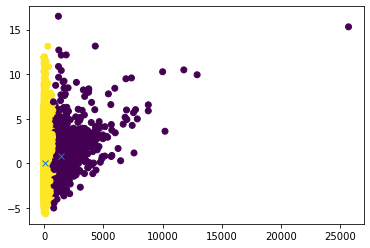

In [69]:
#elegir dos variables
plt.figure(figsize=(6,4))
plt.scatter(data.iloc[:,-1],data.iloc[:,3], c=grupos)
plt.plot(centroides[:,-1], centroides[:,3], 'x')
plt.show()

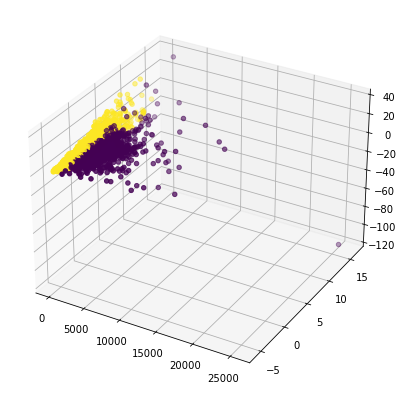

In [70]:
# Elegir 3 variables
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(data.iloc[:,-1], data.iloc[:,3],data.iloc[:,4], c=grupos)
ax.scatter3D(centroides[0,-1],centroides[0,3],centroides[0,4], 'x')


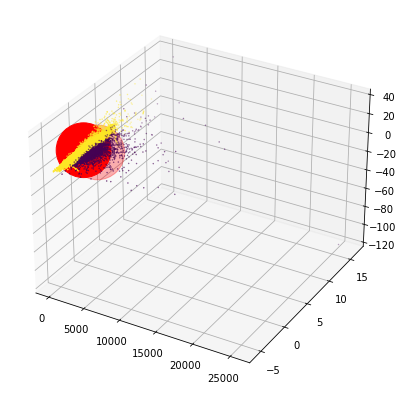

In [71]:
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(centroides[:,-1], centroides[:,3], centroides[:,4], c='r', s=3000)
ax.scatter3D(data.iloc[:,-1], data.iloc[:,3], data.iloc[:,4], c=grupos, s=0.2)

## Ejemplo 2

Tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.

Usted es el propietario del centro comercial y desea comprender a sus clientes. Desea saber quienes clientes pueden ser clientes objetivos para que el equipo de marketing planifique una campaña.

**¿Quiénes son sus clientes objetivo con los que puede iniciar la estrategia de marketing?**

Para responder la pregunta anterior necesitamos realizar lo siguiente:

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Conclusiones o comentarios acerca de los resultados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from EDA import eda as cd


In [72]:
data_customer = pd.read_csv('Data/Mall_Customers.csv')

In [73]:
data_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# Aplicar el criterio de seleccion de grupois
X_data = data_customer.iloc[:,[2,3,4]]


In [75]:
X_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


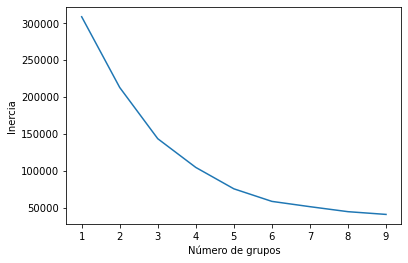

In [76]:
criterio_codo_kmeans(10,X_data)

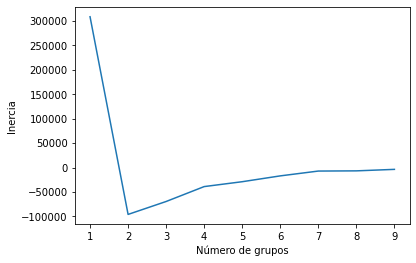

In [77]:
criterio_gradiente_kmeans(10,X_data)

In [78]:
model_opt = KMeans(n_clusters=4,random_state=5, init='random')
model_opt = model_opt.fit(X_data)
centroides=model_opt.cluster_centers_
grupos = model_opt.predict(X_data)


In [80]:
centroides

array([[24.82142857, 28.71428571, 74.25      ],
       [32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895],
       [44.89473684, 48.70526316, 42.63157895]])

In [81]:
X_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Text(0.5, 0, 'Spending Score (1-100)')

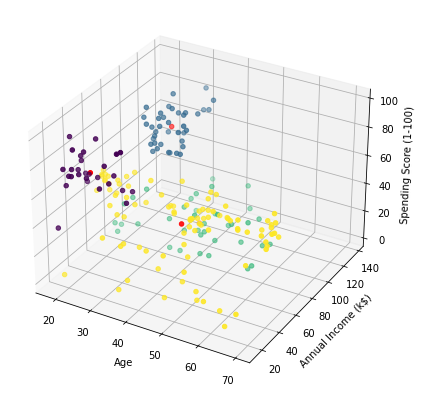

In [88]:
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(centroides[:,0], centroides[:,1], centroides[:,2], c='r')
ax.scatter3D(X_data.iloc[:,0], X_data.iloc[:,1], X_data.iloc[:,2], c=grupos)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

## Actividad 3

Agrupar usuarios Twitter de acuerdo a su personalidad con K-means.

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA (obtener al menos 3 insights)

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Graficar, concluir y comentar acerca de los resultados.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
#Leer datos


In [ ]:
##  tabla de información estadística que nos provee Pandas dataframe:


In [ ]:
# dqr del dataframe


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1-> Actor/actriz

2->Cantante

3->Modelo

4->Tv, series

5->Radio

6->Tecnología

7->Deportes

8->Politica

9->Escritor


In [ ]:
## Histogramas


Las variables que nos pueden servir para la agrupación pueden ser `["op","ex","ag"]`

In [ ]:
# Crear la figura


# Plotear


## Elección de los grupos óptimos

Vamos a hallar el valor de K mediante el criterio del codo


In [ ]:
# Criterio del codo

# plot de las inercias


Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

In [ ]:
#Aplicar kmeans con el num opt de grupos


### Clasificar nuevas muestras


 podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. 

In [ ]:
## Obtener el grupo de una nueva muestra

# Ejemplo 4

In [ ]:
## Importatr digitos

In [ ]:
# Cluster por Kmeans